In [53]:
# Import all the packages at once 
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import os

from nltk.corpus import stopwords
from datetime import date
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

In [54]:
# First load in the speach data frame
speeches = pd.read_pickle("scores_data_with_party.pkl")

In [55]:
# This function is designed to strip out a type of word (default=adjective) in a peice of text 
# First: Tokenize the text.
# Second: Strip out punctuation
# Third: Use NLTK to tag them with a part of speech tag
# Fourth: Remove stopwords (eg Not, because, everything etc.)
# Fifth: Return refined list of words

def strip_out_pos(text, pos = ['JJ']):
    # First: Tokenize the text.
    speech_tokens = nltk.word_tokenize(text)
    
    # Second: Strip out punctuation
    pattern = re.compile(r'[^\W]') 
    cleaned_speech_tokens = [item.lower() for item in speech_tokens if re.match(pattern,item)]
    
    # Third: Use NLTK to tag them with a part of speech tag
    speech_tokens_pos_tag = nltk.pos_tag(cleaned_speech_tokens)
    speech_tokens_pos = []
    for item in speech_tokens_pos_tag:
        if item[1] in pos:
            if len(item[0])>=5:
                if item[0] not in ['thank','applause','laughter','american']:
                    speech_tokens_pos.append(item[0])
    
    # Fourth: Remove stopwords (eg Not, because, everything etc.)
    refined_speech_tokens = [item for item in speech_tokens_pos if not item in stopwords.words('english')]

    # Fifth: Return refined list of words
    return refined_speech_tokens


In [56]:
# This function combines all of an individual presidents speeches and returns the POS
def speech_combiner(president):
    dataframe = speeches.loc[speeches['president'] == president]
    string_ = ""
    for row in dataframe['speeches']:
        string_ = string_ + str(row)
    return strip_out_pos(string_)

obama_speech_pos = speech_combiner("Barack Obama")
trump_speech_pos = speech_combiner("Donald Trump")

def speech_combiner_party(party):
    dataframe = speeches.loc[speeches['party'] == party]
    string_ = ""
    for row in dataframe['speeches']:
        string_ = string_ + str(row)
    return strip_out_pos(string_)

rep_pos = speech_combiner_party("R")
dem_pos = speech_combiner_party("D")

In [63]:
# This function defines our word cloud plot
def make_image_word_cloud(speech,image):
    # put out
    image_array = np.array(Image.open(image))
    image_colors = ImageColorGenerator(image_array)
    
    wc = WordCloud(background_color="white",max_words = 50,mask=image_array, max_font_size=120)
    wc.generate(str(speech))
    
    fig, axes = plt.subplots(1, 2, figsize=(35,35))
    axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    axes[1].imshow(image_array,cmap=plt.cm.gray, interpolation="bilinear")
    axes[0].set_axis_off()
    axes[1].set_axis_off()
    plt.show()

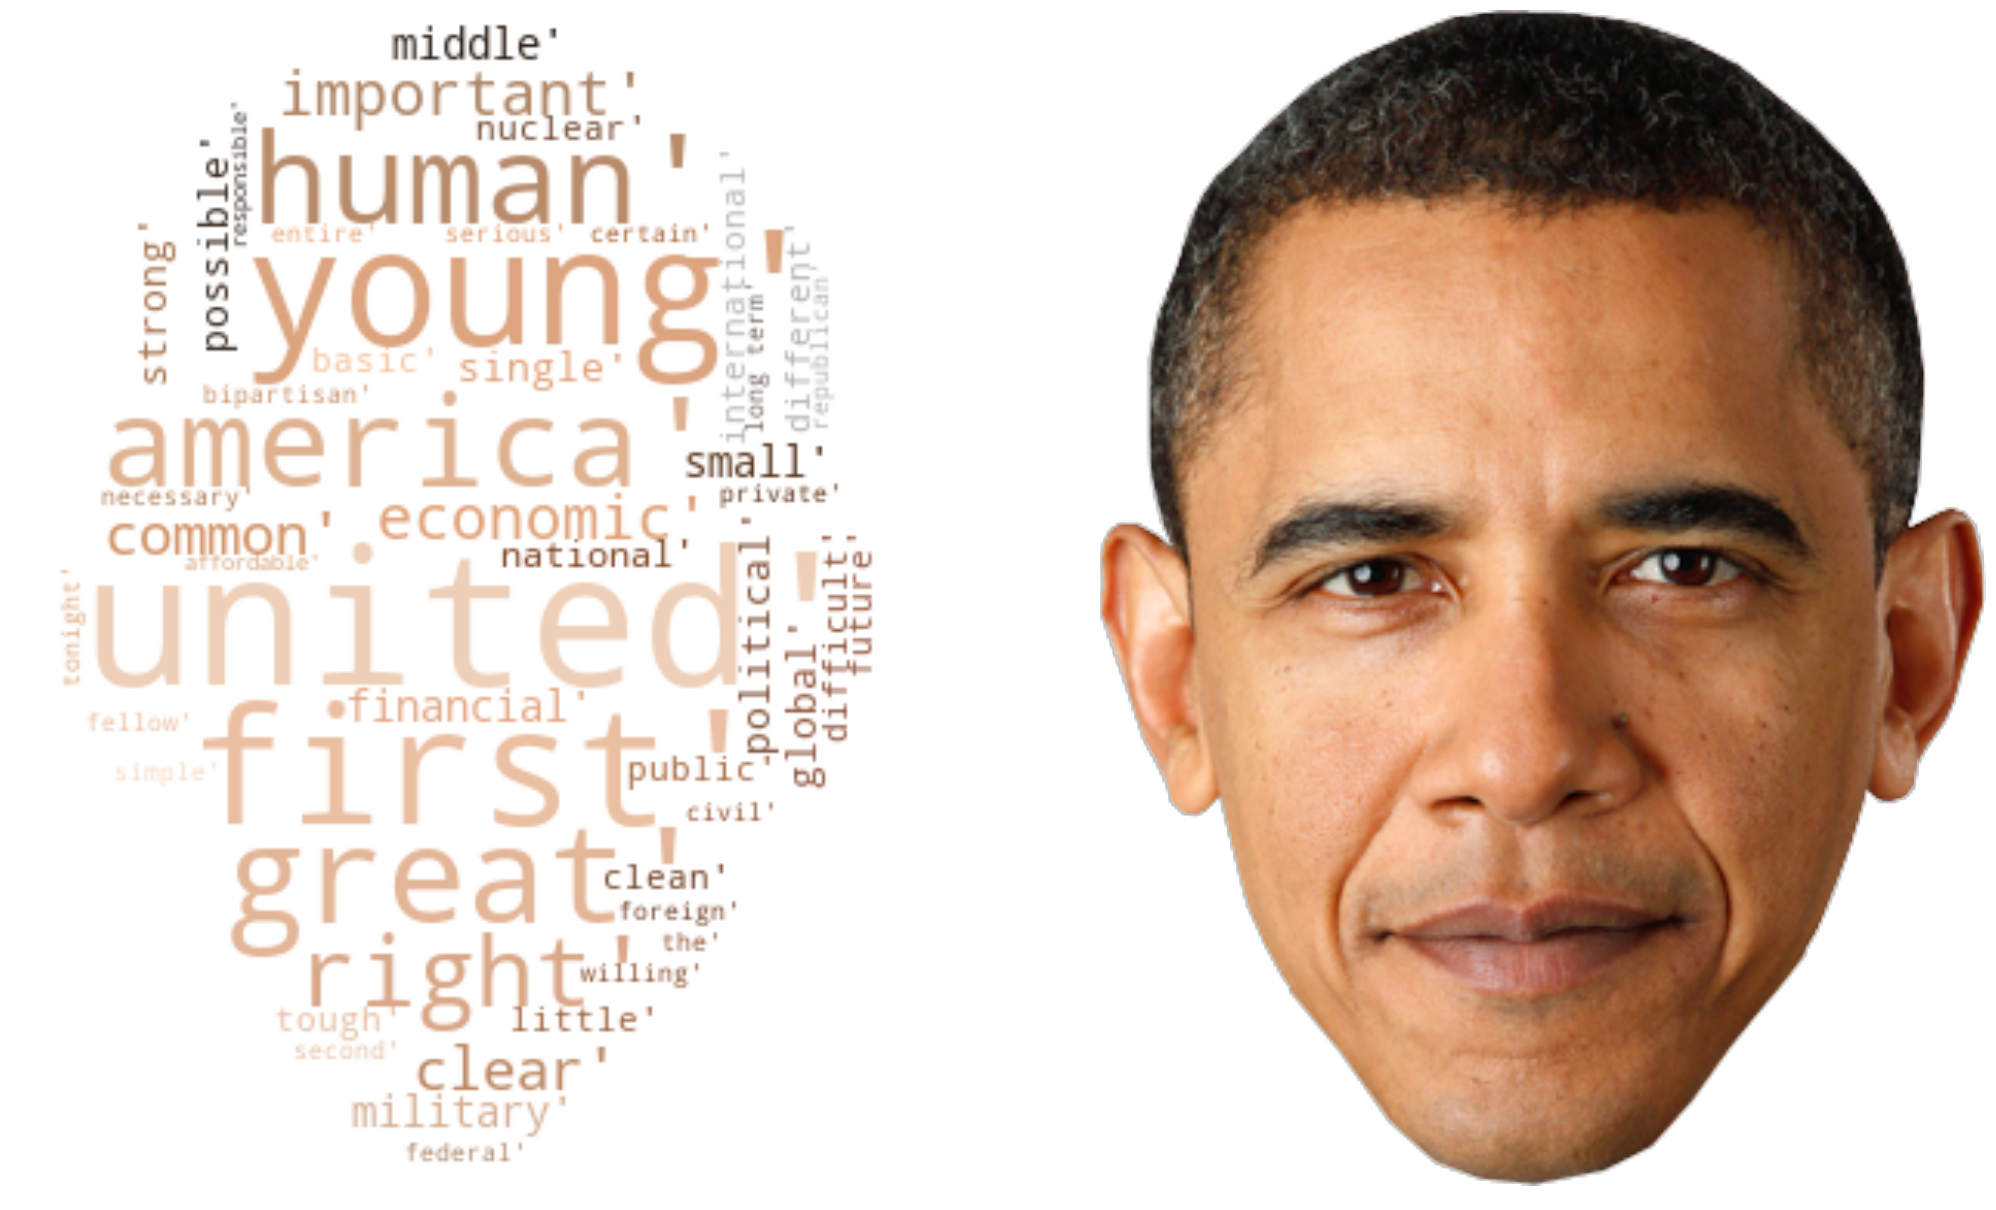

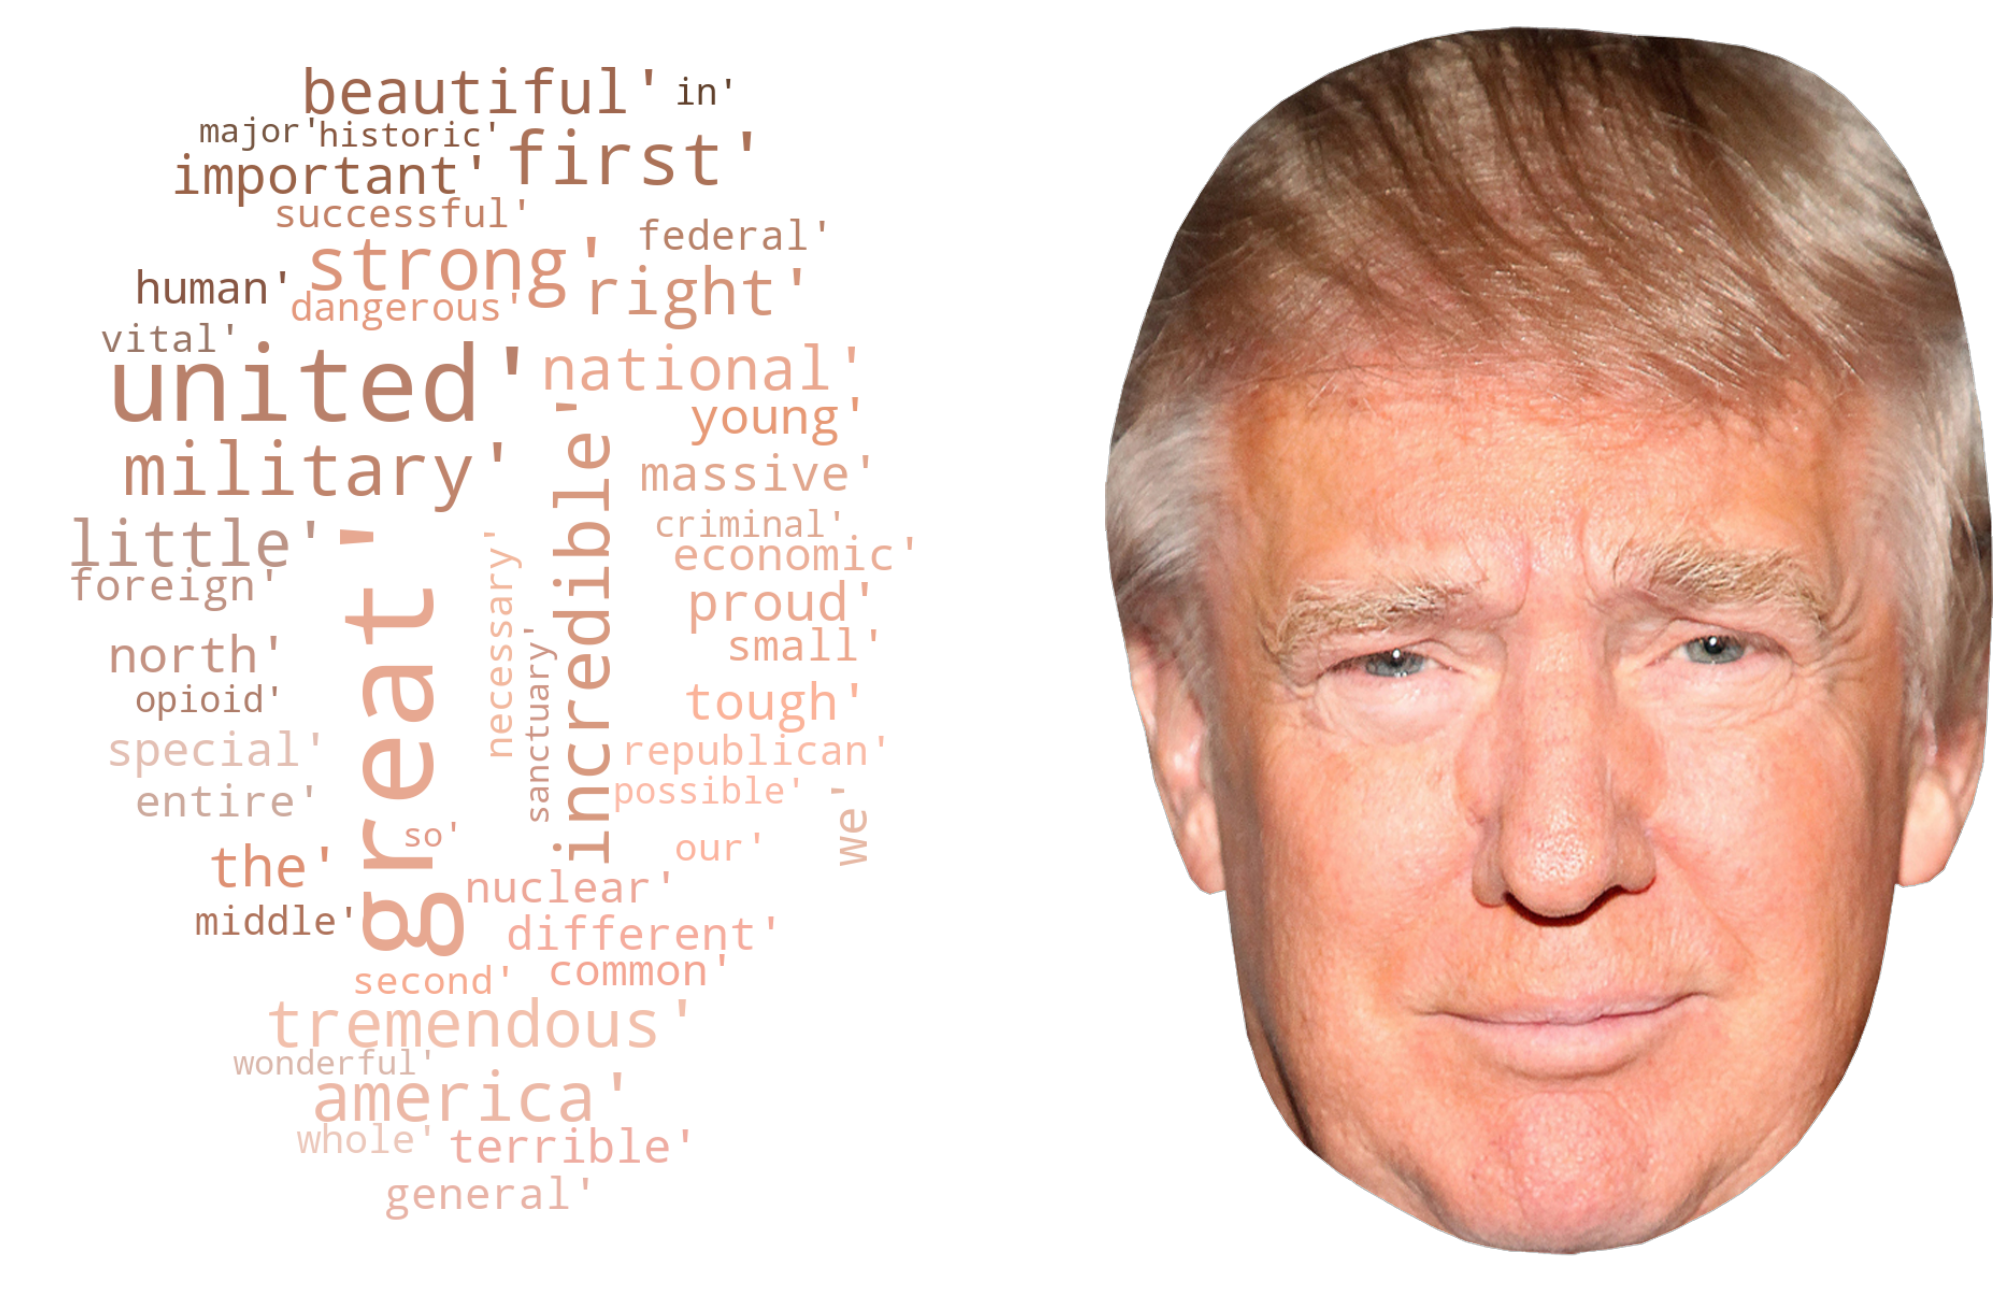

In [64]:
make_image_word_cloud(obama_speech_pos,'obama.png')
make_image_word_cloud(trump_speech_pos,'trump.png')

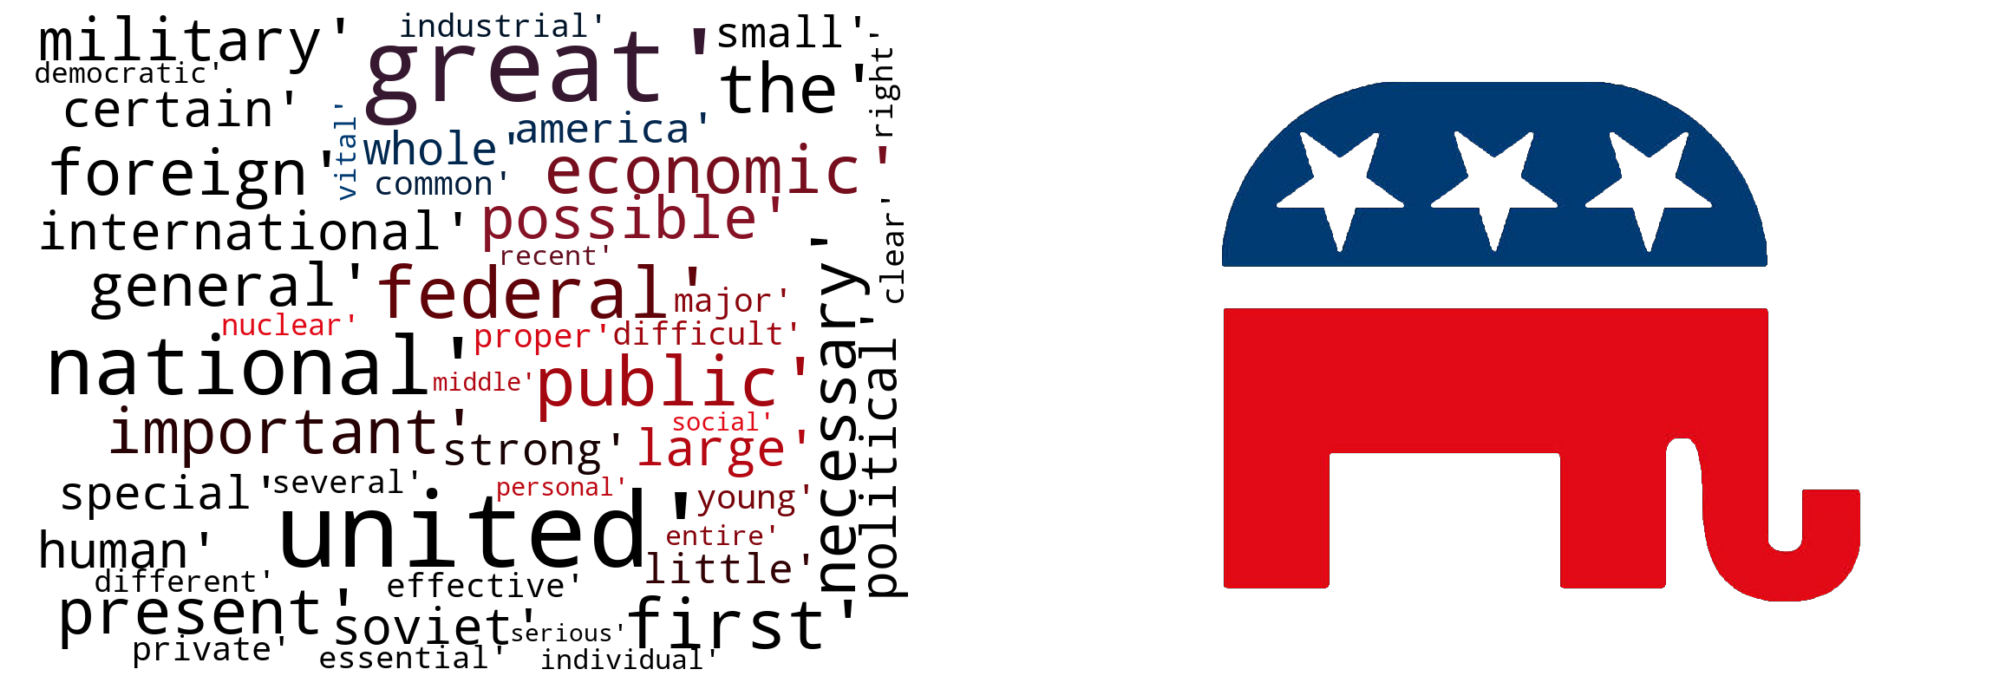

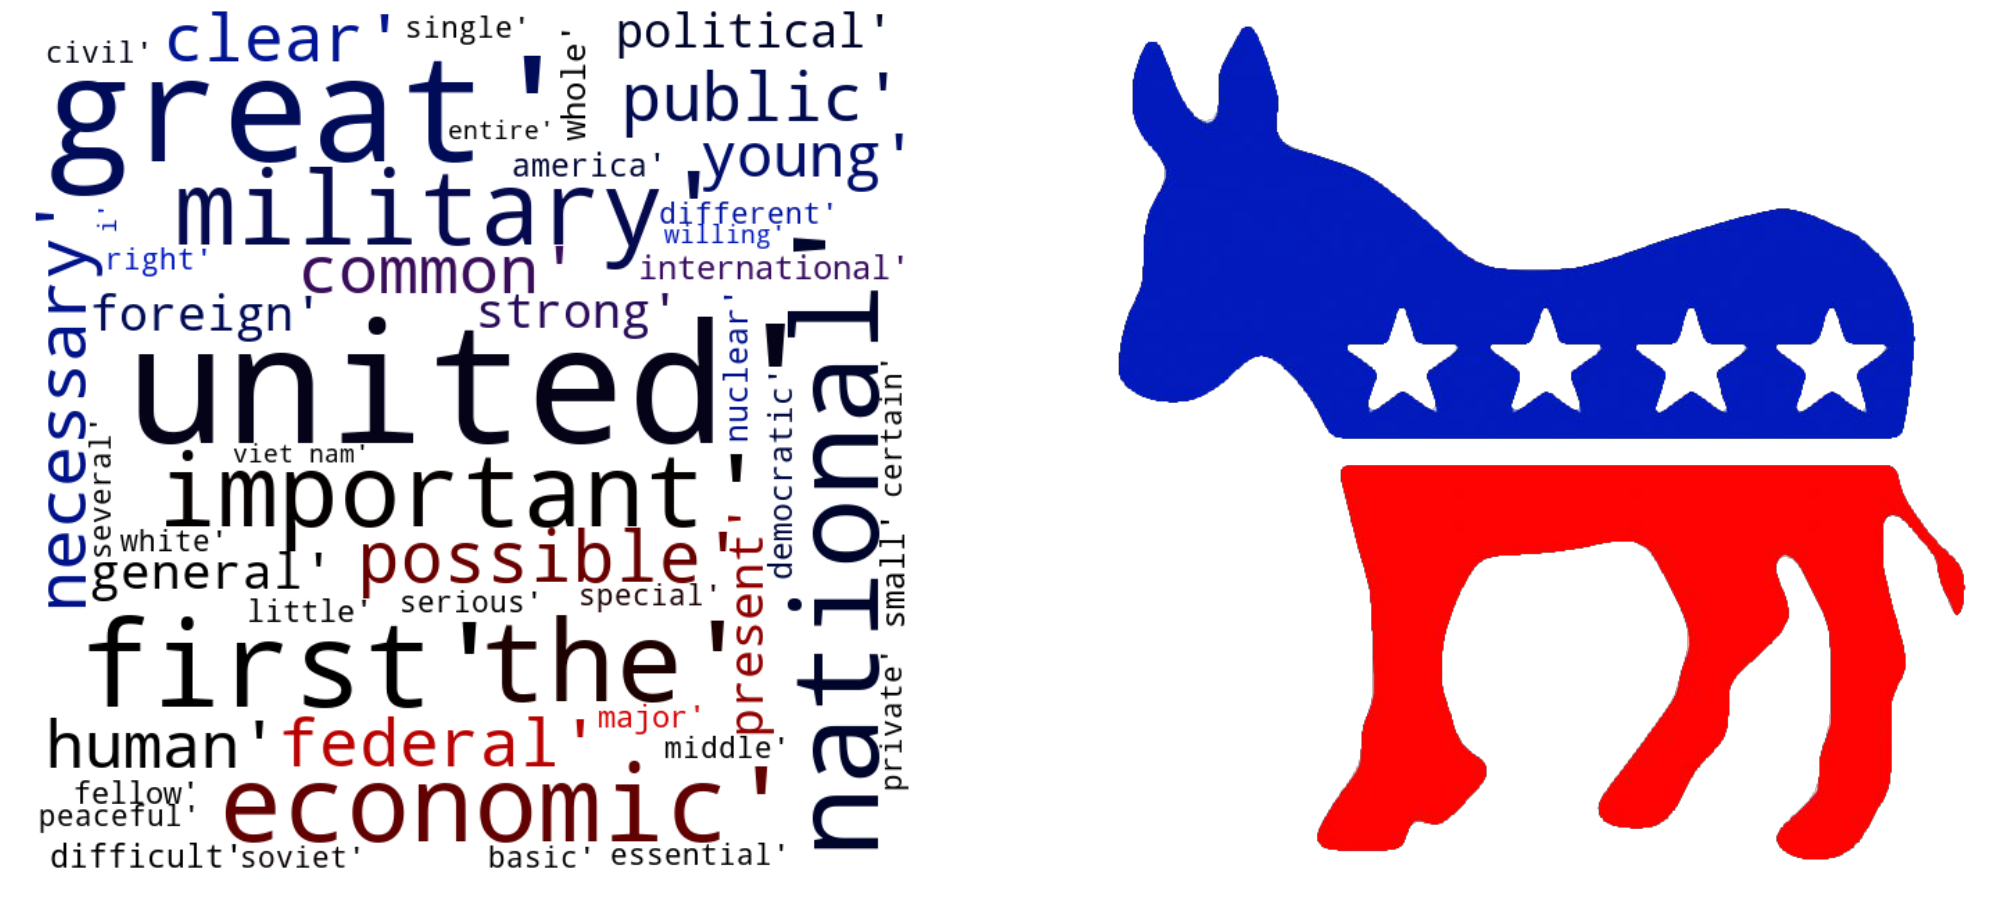

In [65]:
make_image_word_cloud(rep_pos,'repu.png')
make_image_word_cloud(dem_pos,'dem.png')